# Setup

In [3]:
!pip install -qU anthropic IPython

Pakiety:

1. `anthropic` - jest to oficjalna biblioteka klienta API dla usług Anthropic, umożliwiająca programistom łatwe łączenie się z modelami AI Anthropic, takimi jak Claude.

2. `IPython` - to rozszerzone środowisko interaktywne dla Pythona, oferujące bogatsze funkcje niż standardowa konsola Pythona, takie jak kolorowanie składni, auto-uzupełnianie kodu i lepsza pomoc interaktywna.

In [4]:
import base64
from anthropic import Anthropic
from IPython.display import Image
from google.colab import userdata


In [5]:
class CFG:
    model = "claude-3-opus-20240229"
    max_tokens = 2028

In [6]:
client = Anthropic(api_key = userdata.get('claude'))

# Funkcje

In [7]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Przypadki


## Drukowany tekst

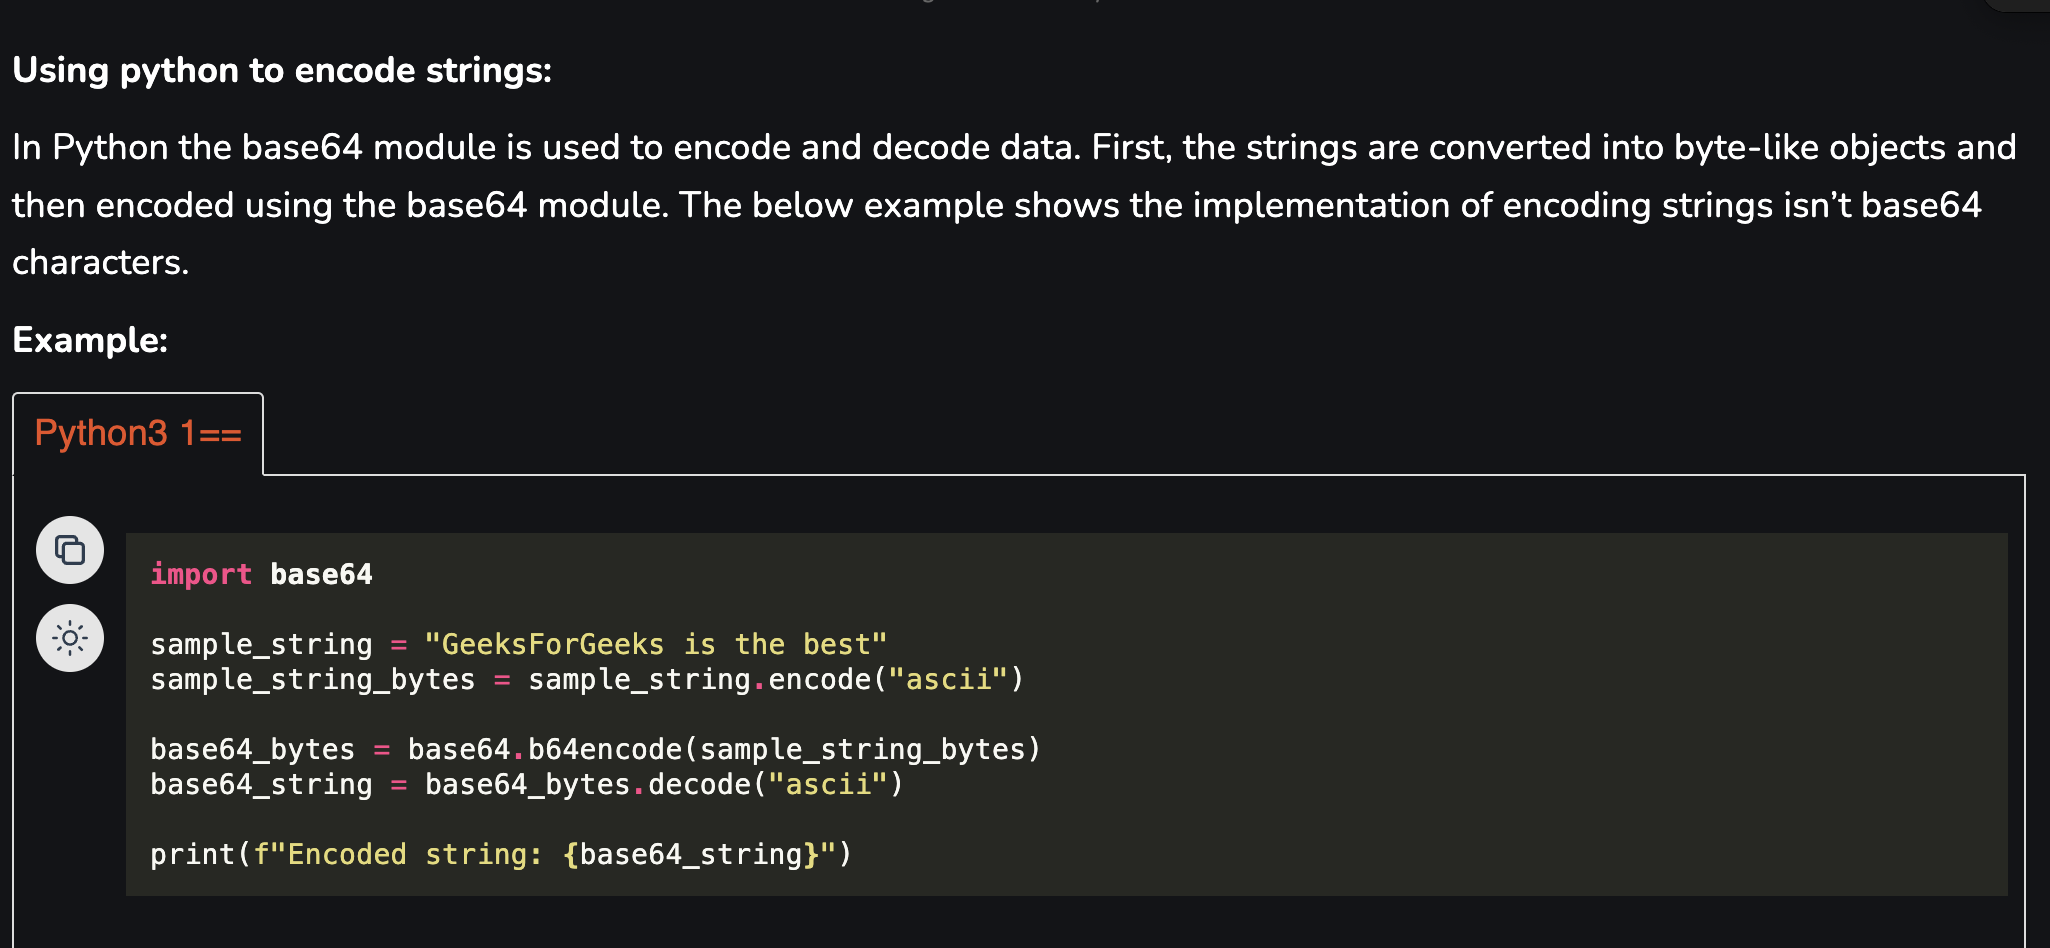

In [ ]:
my_path = '/content/code.png'
Image(filename = my_path)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                        "media_type": "image/png", "data": get_base64_encoded_image(my_path)}},
            {"type": "text", "text": "Transcribe the code in the answer. Only output the code."}
        ]
    }
]

response = client.messages.create(
    model = CFG.model,
    max_tokens = CFG.max_tokens,
    messages = message_list
)
print(response.content[0].text)

import base64

sample_string = "GeeksForGeeks is the best"
sample_string_bytes = sample_string.encode("ascii")

base64_bytes = base64.b64encode(sample_string_bytes)
base64_string = base64.bytes.decode("ascii")

print(f"Encoded string: {base64_string}")


## Pismo odręczne

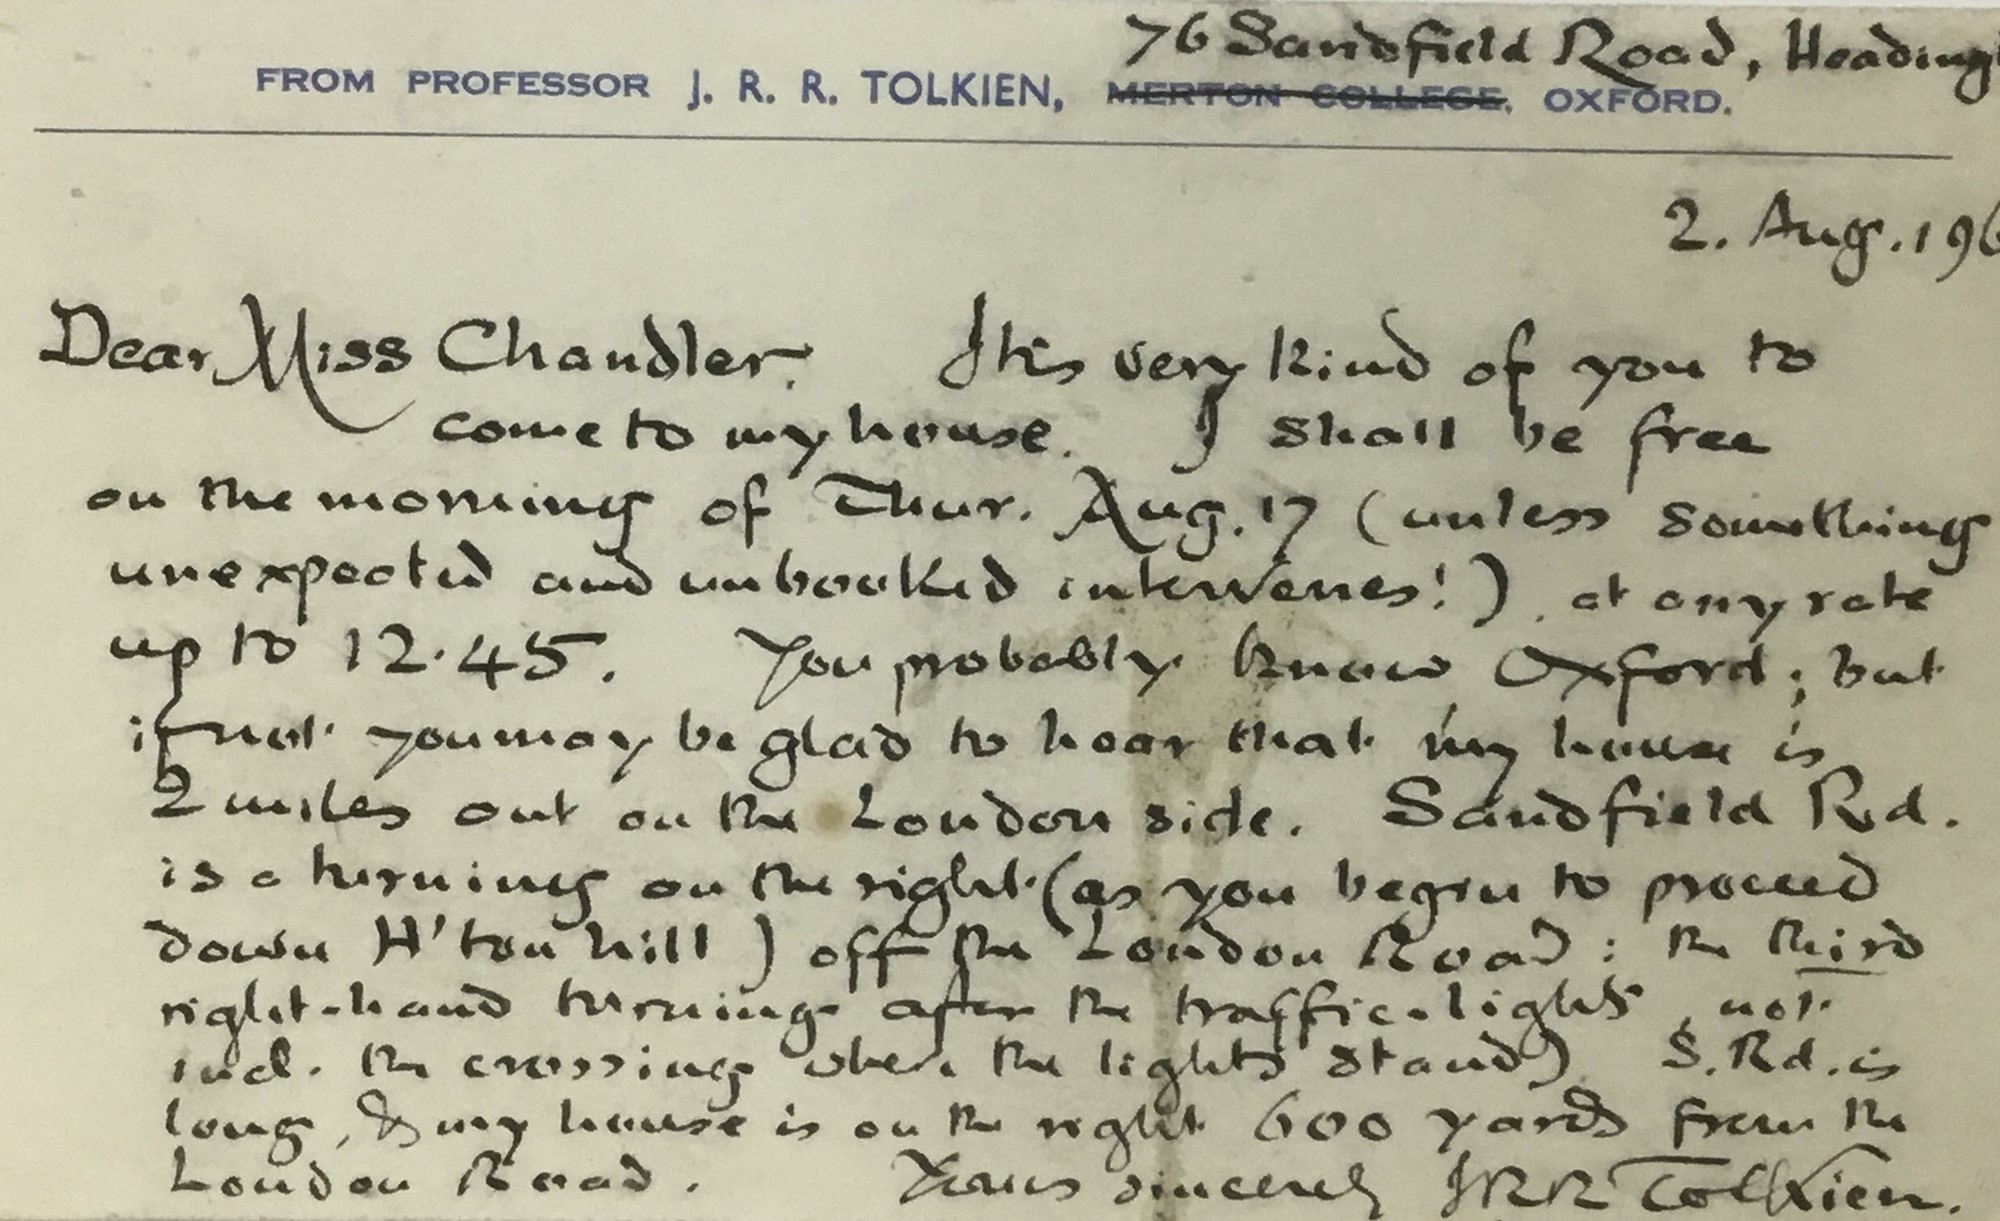

In [ ]:
my_path = '/content/tolkien_letter.jpg'
Image(filename = my_path)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                            "media_type": "image/jpeg", "data": get_base64_encoded_image(my_path)}},
            {"type": "text", "text": "Transcribe this text. Only output the text and nothing else."}
        ]
    }
]

response = client.messages.create(
    model = CFG.model,
    max_tokens = CFG.max_tokens,
    messages = message_list
)
print(response.content[0].text)

Dear Miss Chandler,
It is very kind of you to come to my house. I shall be free on the morning of Sun. Aug. 17 (unless something unexpected and unbooked intervenes!) at any rate up to 12.45. You probably know Oxford, but if not you may be glad to hear that my house is 2 miles out on the London side. Sandfield Rd. is a turning on the right(as you begin to proceed down H'hill) off the London Road: the third right-hand turning after the traffic-lights, not incl. the crossing where the lights stand). S.R.d. is long; + my name is on the right 600 yards from the London Road.
Yours sincerely,
J R R Tolkien


## Formularz

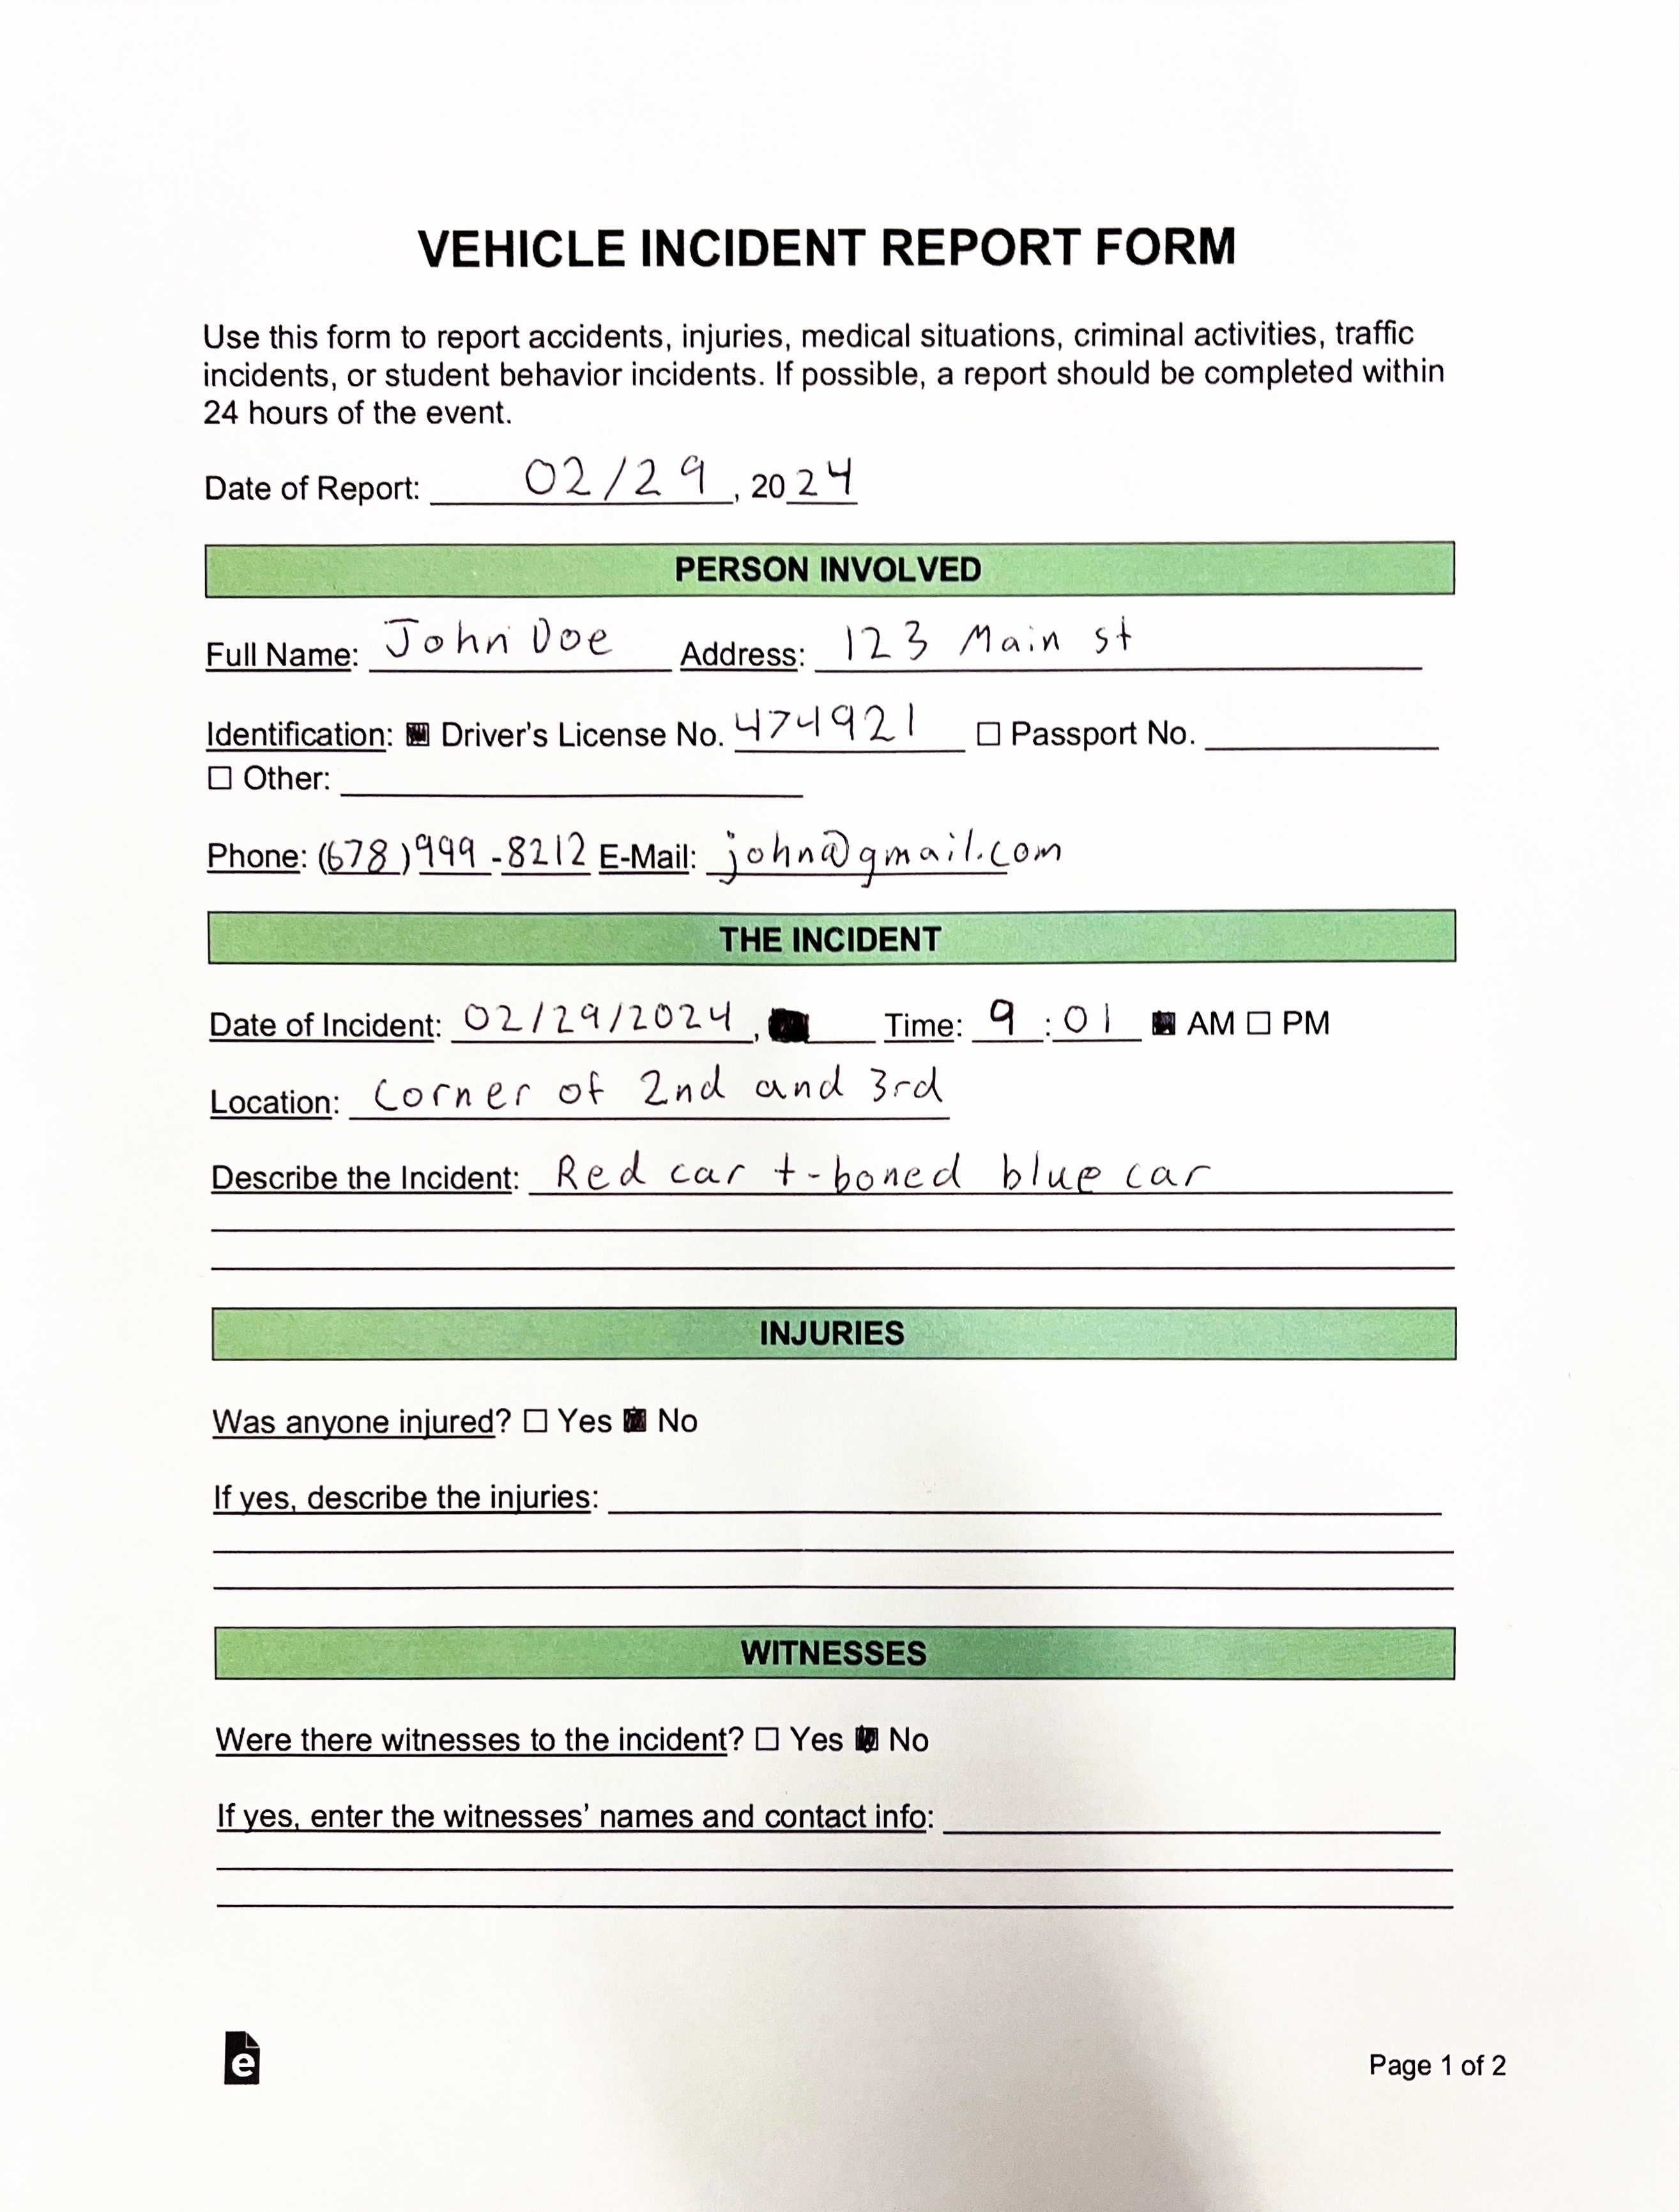

In [ ]:
my_path = '/content/vehicle_form.jpg'
Image(filename = my_path)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                            "media_type": "image/jpeg", "data": get_base64_encoded_image(my_path)}},
            {"type": "text", "text": "Transcribe this form exactly."}
        ]
    }
]

response = client.messages.create(
    model = CFG.model,
    max_tokens = CFG.max_tokens,
    messages = message_list
)
print(response.content[0].text)

VEHICLE INCIDENT REPORT FORM

Use this form to report accidents, injuries, medical situations, criminal activities, traffic
incidents, or student behavior incidents. If possible, a report should be completed within
24 hours of the event.

Date of Report: 02/29, 2024

PERSON INVOLVED

Full Name: John Doe Address: 123 Main St

Identification: ■ Driver's License No. 474921 □ Passport No. ___________
□ Other: ___________________________

Phone: (678) 999-8212 E-Mail: john@gmail.com

THE INCIDENT

Date of Incident: 02/29/2024 ■ Time: 9:01 ■ AM □ PM

Location: Corner of 2nd and 3rd

Describe the Incident: Red car t-boned blue car
__________________________________________________________________________
__________________________________________________________________________

INJURIES

Was anyone injured? □ Yes ■ No

If yes, describe the injuries: ________________________________________________
__________________________________________________________________________
____________________

## Dokument - Q&A

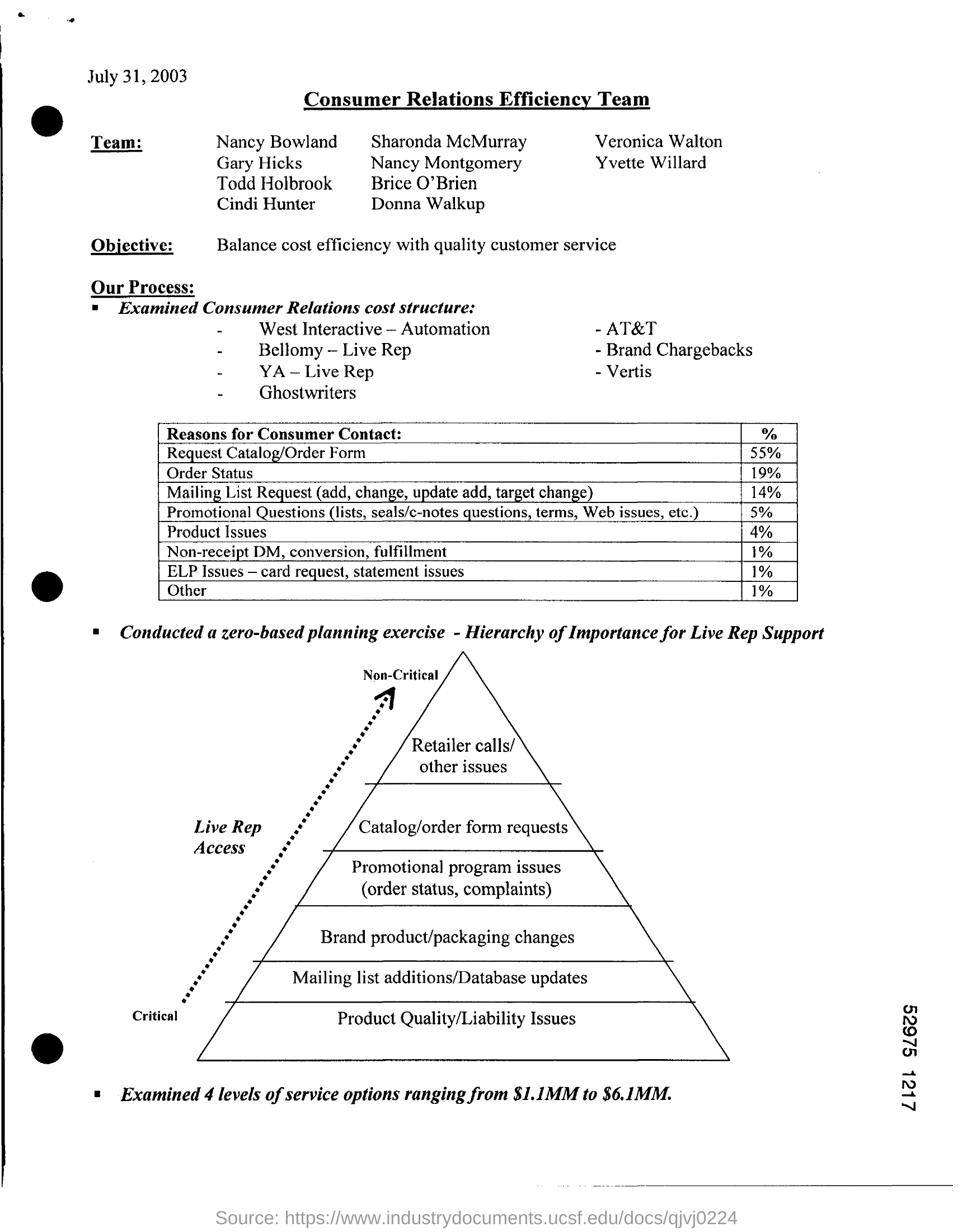

In [ ]:
my_path = '/content/page.jpeg'
Image(filename = my_path)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                    "media_type": "image/jpeg", "data": get_base64_encoded_image(my_path)}},
            {"type": "text", "text": "Which is the most critical issue for live rep support?"}
        ]
    }
]

response = client.messages.create(
    model = CFG.model,
    max_tokens = CFG.max_tokens,
    messages = message_list
)
print(response.content[0].text)


According to the "Hierarchy of Importance for Live Rep Support" pyramid diagram in the image, the most critical issue for live rep support is Product Quality/Liability Issues. This category sits at the bottom of the pyramid, indicating it is the highest priority and most important issue for live reps to handle when providing customer support.


## Struktury

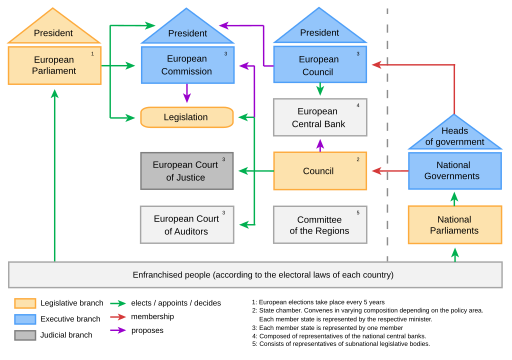

In [ ]:
my_path = '/content/europewtf.png'
Image(filename = my_path, height = 600, width = 900)

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                    "media_type": "image/png", "data": get_base64_encoded_image(my_path)}},
            {"type": "text", "text": "Turn this org chart into JSON indicating who appoints whom.\
                    Only output the JSON and nothing else."}
        ]
    }
]

response = client.messages.create(
    model = CFG.model,
    max_tokens = CFG.max_tokens,
    messages = message_list
)
print(response.content[0].text)

{
  "President": {
    "appointed_by": "European Council",
    "appoints": [
      "European Commission",
      "Legislation"
    ]
  },
  "European Council": {
    "appointed_by": null,
    "appoints": [
      "President"
    ]
  },
  "European Commission": {
    "appointed_by": "President",
    "appoints": [
      "Legislation"
    ]
  },
  "Legislation": {
    "appointed_by": [
      "President",
      "European Commission"
    ],
    "appoints": [
      "European Court of Justice",
      "European Court of Auditors"
    ]
  },
  "European Court of Justice": {
    "appointed_by": "Legislation",
    "appoints": []
  },
  "European Court of Auditors": {
    "appointed_by": "Legislation",
    "appoints": []
  },
  "Council": {
    "appointed_by": null,
    "appoints": [
      "Committee of the Regions"
    ]
  },
  "Committee of the Regions": {
    "appointed_by": "Council",
    "appoints": []
  },
  "European Central Bank": {
    "appointed_by": null,
    "appoints": []
  },
  "Heads 